In [14]:
import numpy as np
import pandas as pd

In [15]:
df =pd.read_csv("../data/procedure_call_overhead.csv", index_col=None)
display(df)

,Experiment,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,1,154.497391,156.387497,151.164062,151.287582,159.799835,154.118240,150.607330,151.199753,150.313934,150.822464
1,2,153.031433,152.454407,150.060028,150.115219,149.982620,149.378983,150.347015,150.089279,150.020096,155.348190
2,3,150.484802,154.692383,155.285980,152.742081,155.616226,157.529175,156.199875,150.604630,157.732666,156.337143
3,4,154.518661,150.968399,151.704178,153.259125,151.669922,156.364624,159.735809,159.794571,159.956528,159.200211
4,5,152.092163,151.661484,156.014862,153.653885,151.441925,151.243347,151.125168,151.200455,152.808197,151.364105
5,6,150.987167,151.306656,151.043045,150.786301,151.560349,154.395065,159.631393,159.612686,156.262619,152.876328
6,7,154.095901,151.005035,153.329056,153.663696,154.031219,152.289093,154.294281,151.854050,154.292206,150.804962
7,8,155.905899,154.366211,151.088730,151.989349,156.741333,157.122101,156.221100,152.368729,160.290054,153.457947


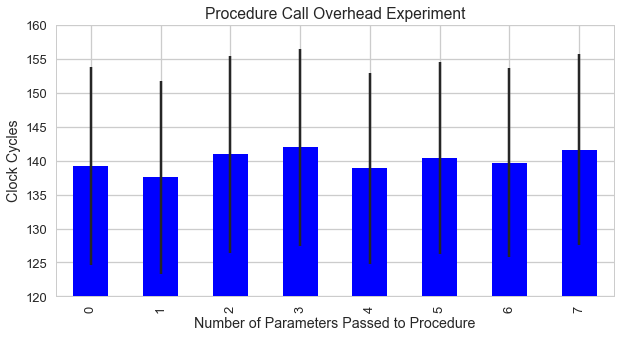

In [38]:
df.mean(axis=1).plot.bar(yerr=(df.std(axis=1) / np.sqrt(10)), color='b', ylim=(120, 160), figsize=(10, 5))
plt.title("Procedure Call Overhead Experiment")
plt.xlabel("Number of Parameters Passed to Procedure")
plt.ylabel("Clock Cycles")
plt.savefig("../figures/procedure_call_overhead.png", bbox_inches='tight')
plt.show()